# <font size="7"> **Assignment-6**</font>
I hope this assignment will give you clarity on how mathematical models like **Multilayer Perceptrons (MLP)** can be made from scratch using **PyTorch** & can be used to solve complex, non-linear geometric problems **without relying on black-box libraries**.

---
# ⚫ **Mission Critical: The Exclusion Zone Protocol**

**Date:** Year 2142  
**Location:** Exoplanet *Kepler-186f*   **Clearance:** IITians

---

### **⚫ The Story**
Humanity has colonized the distant exoplanet *Kepler-186f*. While the surface is habitable, the planet's magnetic core is unstable. The **Global Defense Council (GDC)** has identified a dangerous phenomenon known as the **"Radiation Ring."**

Sensors indicate that the safe zones on the planet follow a peculiar geometry:
* ⚫ **The Core Zone:** Distance $< 2$ km from the colony center (Safe).
* ⚫ **The Outer Wilds:** Distance $> 4$ km from the colony center (Safe).
* ⚫ **The Dead Zone:** The region **between 2 km and 4 km** is flooded with lethal gamma radiation.

Your engineering team has deployed **3,000 sensor drones** across the colony to map this danger. Each drone reports its coordinates $(x, y)$ and a binary label:
* `1`: Radiation Detected (Dead Zone)
* `0`: Safe Zone

 **⚫ The Problem:** The sensors are cheap and prone to interference. Approximately **5%** of the drones are malfunctioning and reporting the wrong safety status (noise). The GDC mainframe is a legacy system that forbids the use of modern "Neural Libraries" (i.e., you cannot use `torch.nn` or `torch.optim`). You must build a **Multi-Layer Perceptron (MLP) from scratch** to filter out the noise and mathematically define the Exclusion Zone boundaries using **PyTorch**. ( Hint: You know this is a binary classification problem, which Loss function would you use?? )

---

### **⚫ Your Objective**

1.  **Initialize the System:** Use your **Group Number** as the random seed. This ensures your team works on a unique sensor distribution pattern.
2.  **Architect the Filter:** Construct a neural network with **3 hidden layers** (16 neurons each) to learn the non-linear "donut" shape of the Dead Zone.
3.  **Manual Calibration:** You cannot use auto-optimizers. You must manually calculate the gradients (Backpropagation) and update the system weights using **Gradient Descent**.
4.  **Verify Integrity:** Split your sensor data (70% training, 30% validation). Prove that your system doesn't just memorize the malfunctioning sensors (overfitting) but actually learns the geometric shape of the Dead Zone.

---

## ⚫ Engineering Constraints (Read Carefully)

**1. Restricted Modules**
*  **Forbidden:** You are strictly forbidden from importing `torch.nn` (Layers/Loss) or `torch.optim` (Optimizers).
*  **Allowed:** `import torch`, `import matplotlib.pyplot`, `import pandas`, `import numpy`, using `sklearn`.


**2. The Mechanics**
* **Forward Pass:** Must be implemented using raw matrix multiplication (`torch.matmul`) and bias addition.
* **Backward Pass:** You **MAY** use `loss.backward()` to compute gradients automatically (Autograd).
* **Optimization:** You **MUST** implement the weight updates manually (Stochastic Gradient Descent).
    > `w_new = w_old - learning_rate * w_old.grad`

**3. Loss Function**
Since `torch.nn` is banned, you must implement **Binary Cross Entropy** manually using basic tensor math.

$$Loss = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1-y_i) \cdot \log(1-\hat{y}_i)]$$

* **Note:** Ensure you handle the log of zero (numerical stability) or use `torch.clamp` to avoid `NaN` errors.

**4. Visual Proof:** Your final output must include a Decision Boundary Map showing the "Donut" shape.


---

### ⚫ **The GDC Dashboard (Required Output)**



The Global Defense Council requires visual confirmation that your system is stable before we can upload it to the drone fleet. You must generate a **3-Panel Heads-Up Display (HUD)** containing the following telemetry:

**1. System Error Trajectory (Loss Plot)**
* **Mission:** Plot the **Training Loss** (Blue) vs. **Validation Loss** (Orange) over all epochs.
* **Why:** We need to confirm that the system is actually learning and not just diverging (exploding gradients).

**2. Integrity Check (Accuracy Plot)**
* **Mission:** Plot the **Training Accuracy** vs. **Validation Accuracy**.
* **Why:** If Training Accuracy is high (95%) but Validation Accuracy is low (80%), you have failed to generalize. This is a sign of **Overfitting**—memorizing sensor noise instead of the Radiation Ring.

**3. Geospatial Threat Map (Decision Boundary)**
* **Mission:** Visualize the **Validation Set** on a 2D map.
* **Overlay:** Draw the neural network's **Decision Boundary** (the contours where confidence = 0.5).
* **Why:** The Commander needs to *see* the "Donut" shape. If your boundary looks like a jagged mess, the model is rejected.

---

In [1]:
import torch
import numpy as np
# ===========================================================
# PART 1: Data Generation (The Exclusion Zone)
# ===========================================================

# ⚠️ INSTRUCTION: Replace 1 with your actual Group Number
GROUP_NUMBER = 1

# Set seed for reproducibility
torch.manual_seed(GROUP_NUMBER)
np.random.seed(GROUP_NUMBER)

def generate_data(n_samples=3000):
    """
    Generates 3000 sensor readings for the Kepler-186f Exclusion Zone.
    Shape: Concentric circles (Donut).
    Logic:
      - Dead Zone (1): 2km < distance < 4km
      - Safe Zone (0): distance < 2km OR distance > 4km
    """
    # Generate random coordinates between -5 and 5 km
    X = (torch.rand(n_samples, 2) * 10) - 5

    # Calculate distance from center (radius)
    radius = torch.sqrt(X[:, 0]**2 + X[:, 1]**2)

    # Assign Labels: 1 if inside the Dead Zone, 0 otherwise
    y = ((radius > 2) & (radius < 4)).float().view(-1, 1)

    # Add 5% Noise (Malfunctioning Drones)
    n_noise = int(0.05 * n_samples)
    noise_indices = torch.randperm(n_samples)[:n_noise]
    y[noise_indices] = 1 - y[noise_indices] # Flip labels

    return X, y

# Generate the dataset
X_full, y_full = generate_data(3000)

print(f"Data Generated: {X_full.shape} samples.")
print(f"Target Generated: {y_full.shape} labels.")

Data Generated: torch.Size([3000, 2]) samples.
Target Generated: torch.Size([3000, 1]) labels.


In [2]:
# ==============================================================================
# Code from here. Best of luckk :)
# ==============================================================================

Dataset Ready | Train: torch.Size([2100, 2]) | Val: torch.Size([900, 2])
Booting GDC Core... Learning Radiation Pattern...
Epoch    0 | Train Loss 0.6934 | Val Acc 60.67%
Epoch  200 | Train Loss 0.6777 | Val Acc 61.67%
Epoch  400 | Train Loss 0.6758 | Val Acc 61.67%
Epoch  600 | Train Loss 0.6717 | Val Acc 61.67%
Epoch  800 | Train Loss 0.6609 | Val Acc 61.67%
Epoch 1000 | Train Loss 0.6203 | Val Acc 55.11%
Epoch 1200 | Train Loss 0.5383 | Val Acc 72.78%
Epoch 1400 | Train Loss 0.4851 | Val Acc 79.33%
Epoch 1600 | Train Loss 0.4605 | Val Acc 81.00%
Epoch 1800 | Train Loss 0.4512 | Val Acc 81.44%
Calibration Finished 


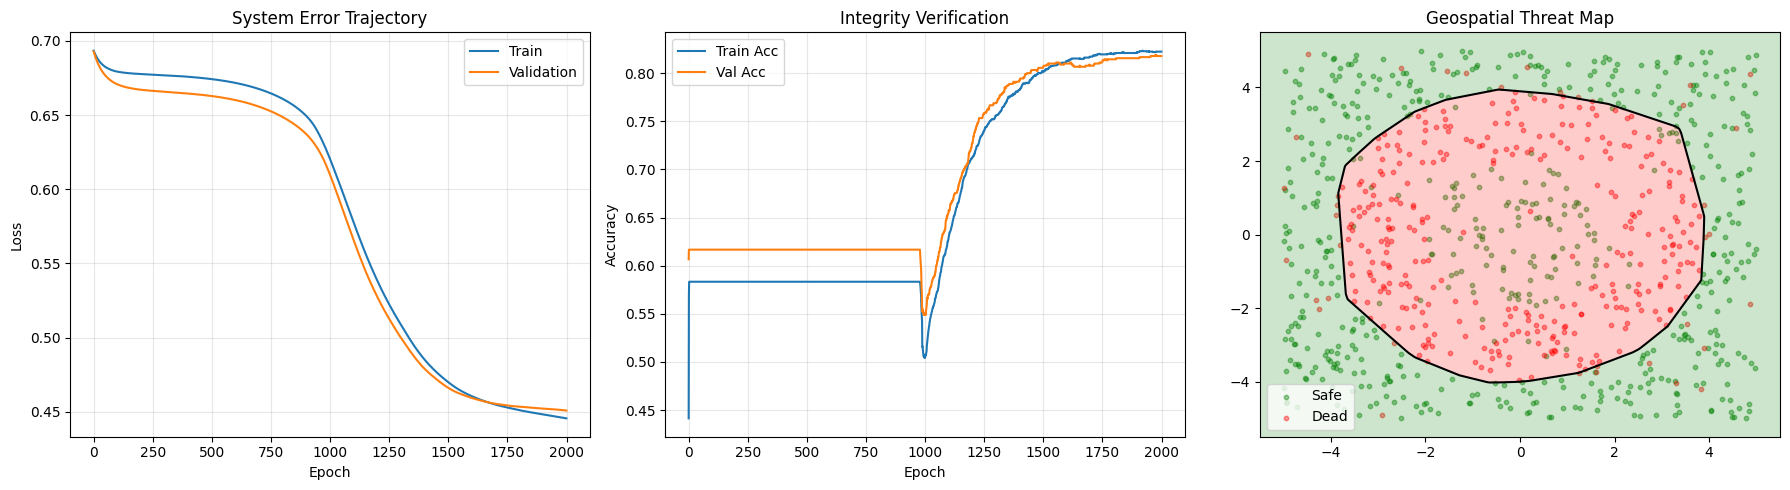

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Convert tensors to numpy for sklearn compatibility
X_np = X_full.detach().numpy()
y_np = y_full.detach().numpy()

X_tr_np, X_va_np, y_tr_np, y_va_np = train_test_split(
    X_np,
    y_np,
    test_size=0.30,
    random_state=GROUP_NUMBER,
    shuffle=True
)

# Back to torch tensors
X_tr = torch.tensor(X_tr_np, dtype=torch.float32)
y_tr = torch.tensor(y_tr_np, dtype=torch.float32)
X_va = torch.tensor(X_va_np, dtype=torch.float32)
y_va = torch.tensor(y_va_np, dtype=torch.float32)

print("Dataset Ready | Train:", X_tr.shape, "| Val:", X_va.shape)

#Network Parameters
IN_FEATURES = 2
MID_FEATURES = 16
OUT_FEATURES = 1

LR = 0.05
TOTAL_EPOCHS = 2000


def make_param(size):
    param = torch.randn(size) * 0.1
    param.requires_grad = True
    return param

# Weight & bias initialization
W_a = make_param((IN_FEATURES, MID_FEATURES))
b_a = torch.zeros(MID_FEATURES, requires_grad=True)

W_b = make_param((MID_FEATURES, MID_FEATURES))
b_b = torch.zeros(MID_FEATURES, requires_grad=True)

W_c = make_param((MID_FEATURES, MID_FEATURES))
b_c = torch.zeros(MID_FEATURES, requires_grad=True)

W_out = make_param((MID_FEATURES, OUT_FEATURES))
b_out = torch.zeros(OUT_FEATURES, requires_grad=True)

learnables = [W_a, b_a, W_b, b_b, W_c, b_c, W_out, b_out]

#Activations & Forward Logic
def relu_fn(t):
    return torch.clamp(t, min=0.0)

def sigmoid_fn(t):
    return 1 / (1 + torch.exp(-t))


def model_forward(inp):
    h1 = relu_fn(inp @ W_a + b_a)
    h2 = relu_fn(h1 @ W_b + b_b)
    h3 = relu_fn(h2 @ W_c + b_c)
    logits = h3 @ W_out + b_out
    return sigmoid_fn(logits)

#Loss & Accuracy

def bce_loss(pred, target):
    pred = torch.clamp(pred, 1e-7, 1 - 1e-7)
    return -(target * torch.log(pred) + (1 - target) * torch.log(1 - pred)).mean()


def acc_score(pred, target):
    cls = (pred >= 0.5).float()
    return (cls == target).float().mean()

#Training Loop
loss_train_log, loss_val_log = [], []
acc_train_log, acc_val_log = [], []

print("Booting GDC Core... Learning Radiation Pattern...")

for step in range(TOTAL_EPOCHS):

    # Training
    out_tr = model_forward(X_tr)
    loss_tr = bce_loss(out_tr, y_tr)

    loss_tr.backward()

    with torch.no_grad():
        for var in learnables:
            var -= LR * var.grad
            var.grad.zero_()

    # Validation
    with torch.no_grad():
        out_va = model_forward(X_va)
        loss_va = bce_loss(out_va, y_va)

        acc_tr = acc_score(out_tr, y_tr)
        acc_va = acc_score(out_va, y_va)

    loss_train_log.append(loss_tr.item())
    loss_val_log.append(loss_va.item())
    acc_train_log.append(acc_tr.item())
    acc_val_log.append(acc_va.item())

    if step % 200 == 0:
        print(f"Epoch {step:4d} | Train Loss {loss_tr:.4f} | Val Acc {acc_va*100:.2f}%")

print("Calibration Finished ")

#GDC DASHBOARD

plt.figure(figsize=(18,5))

# Loss Curve
plt.subplot(1,3,1)
plt.plot(loss_train_log, label="Train")
plt.plot(loss_val_log, label="Validation")
plt.title("System Error Trajectory")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(alpha=0.3)

# Accuracy Curve
plt.subplot(1,3,2)
plt.plot(acc_train_log, label="Train Acc")
plt.plot(acc_val_log, label="Val Acc")
plt.title("Integrity Verification")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(alpha=0.3)

# Decision Boundary
plt.subplot(1,3,3)

safe = (y_va.squeeze() == 0)
danger = (y_va.squeeze() == 1)

plt.scatter(X_va[safe,0], X_va[safe,1], s=10, c="green", alpha=0.4, label="Safe")
plt.scatter(X_va[danger,0], X_va[danger,1], s=10, c="red", alpha=0.4, label="Dead")

xx, yy = np.meshgrid(
    np.linspace(-6,6,250),
    np.linspace(-6,6,250)
)

grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

with torch.no_grad():
    zz = model_forward(grid).reshape(xx.shape)

plt.contour(xx, yy, zz, levels=[0.5], colors="black")
plt.contourf(xx, yy, zz, levels=[0,0.5,1], colors=["green","red"], alpha=0.2)

plt.title("Geospatial Threat Map")
plt.legend()
plt.xlim(-5.5,5.5)
plt.ylim(-5.5,5.5)

plt.tight_layout()
plt.show()
